<a href="https://colab.research.google.com/github/WandersonGustavo/Imersao_Alura/blob/main/dnit_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
base=pd.read_csv('contagem_de_trafego_cgplan.csv',error_bad_lines=False, sep=";")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
base.head
#arrumar as colunas 

<bound method NDFrame.head of         ID  id_trecho_  vl_br sg_uf      nm_tipo_tr sg_tipo_tr desc_coinc  \
0     4317      155030    307    AC  Eixo Principal          B          -   
1     4318      155031    307    AC  Eixo Principal          B          -   
2     4319      158261    307    AC  Eixo Principal          B          -   
3     4320      158260    307    AC  Eixo Principal          B          -   
4     4321      158259    307    AC  Eixo Principal          B          -   
...    ...         ...    ...   ...             ...        ...        ...   
6764  3434      160957    242    TO  Eixo Principal          B          -   
6765  3435      154198    242    TO  Eixo Principal          B          -   
6766  3436      154199    242    TO  Eixo Principal          B          -   
6767  3437      154200    242    TO  Eixo Principal          B          -   
6768  3438      154201    242    TO  Eixo Principal          B          -   

       vl_codigo                             

In [20]:
dadosAgrupados=base.groupby(['id_trecho_']).describe()
dadosAgrupados

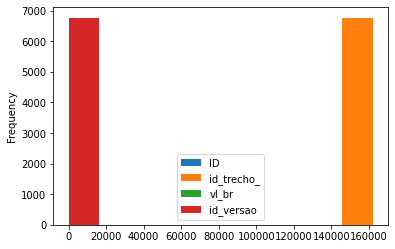

In [19]:
#base.plot.hist(dadosAgrupados)